Lattice Constant (a0): 0.80, Total Energy: 2347755.5535
Lattice Constant (a0): 0.84, Total Energy: 1289793.9028
Lattice Constant (a0): 0.88, Total Energy: 725317.9887
Lattice Constant (a0): 0.92, Total Energy: 416102.1285
Lattice Constant (a0): 0.96, Total Energy: 242704.8681
Lattice Constant (a0): 1.00, Total Energy: 143437.8449
Lattice Constant (a0): 1.04, Total Energy: 85570.9301
Lattice Constant (a0): 1.08, Total Energy: 51312.6329
Lattice Constant (a0): 1.12, Total Energy: 30757.4987
Lattice Constant (a0): 1.16, Total Energy: 18297.2731
Lattice Constant (a0): 1.20, Total Energy: 10689.2933
Lattice Constant (a0): 1.24, Total Energy: 6021.1054
Lattice Constant (a0): 1.28, Total Energy: 3157.4759
Lattice Constant (a0): 1.32, Total Energy: 1409.9715
Lattice Constant (a0): 1.36, Total Energy: 376.1698
Lattice Constant (a0): 1.40, Total Energy: -245.7764
Lattice Constant (a0): 1.44, Total Energy: -596.0058
Lattice Constant (a0): 1.48, Total Energy: -770.8848
Lattice Constant (a0): 1.52,

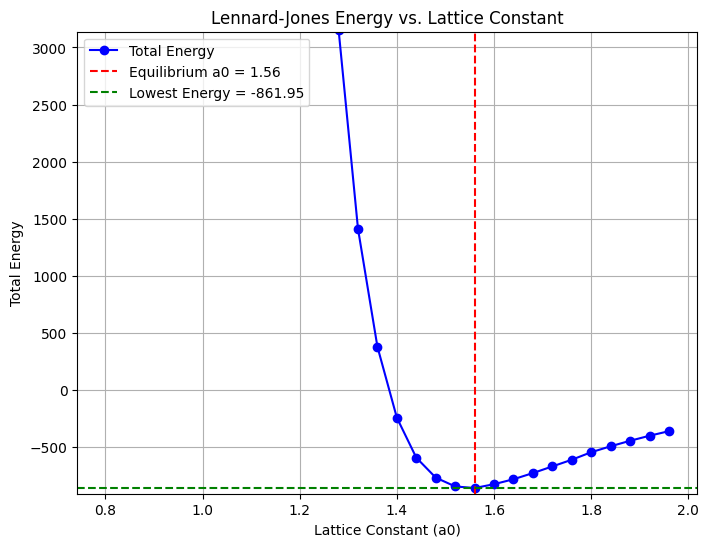

Equilibrium lattice constant (a0) for minimum energy: 1.5600000000000007
Minimum energy: -861.9474866120231


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lj_potential(r):
    if r <= 0:
        raise ValueError("Distance 'r' must be positive.")
    return 4 * ((1 / r)**12 - (1 / r)**6)  #to assume; epsilon = sigma = 1

def gen_fcc(a0,n):
    basis = np.array([
        [0, 0, 0],
        [0.5, 0.5, 0],
        [0.5, 0, 0.5],
        [0, 0.5, 0.5]
    ])
    # Creating lattice positions by repeating basis vectors
    pos = []
    for i in range(n):
        for j in range(n):
            for k in range(n):
                l_point = np.array([i, j, k])
                for b in basis:
                    pos.append((l_point + b) * a0)
    return np.array(pos)

def visualize_fcc_lattice(positions, a):
    """Visualize FCC lattice using a 3D scatter plot."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', marker='o')

    # Set plot limits
    ax.set_xlim([0, a])
    ax.set_ylim([0, a])
    ax.set_zlim([0, a])

    # Label axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('FCC Lattice Structure')
    plt.show()

def min_image_dist(r1,r2,l):
    #Calculating minimum image distance between two points r1 and r2 considering PBC.
    #l: length of cubic box (a * n).
    diff = r1 - r2
    diff = diff - l*np.round(diff/l)
    return np.linalg.norm(diff)

def cal_TE(a0,n,rc):
    a= a0*n
    pos = gen_fcc(a0,n)
    total_energy = 0.0
    n_atoms = len(pos)

    for i in range(n_atoms):
        for j in range(i+1,n_atoms):
            r = min_image_dist(pos[i],pos[j],a)
            if r < rc:
                total_energy += lj_potential(r)

    return total_energy

def min_energy(a0_i,a0_f,a0_s,n,rc):
    lattice_const = np.arange(a0_i,a0_f,a0_s)
    energies = []

#calculating energies for different lattice constants to find min
    for a0 in lattice_const:
        energy = cal_TE(a0,n,rc)
        energies.append(energy)
        print(f"Lattice Constant (a0): {a0:.2f}, Total Energy: {energy:.4f}")
        
    min_energy = min(energies)
    optimal_a0 = lattice_const[energies.index(min_energy)]

    plt.figure(figsize=(8, 6))
    plt.plot(lattice_const, energies, marker='o', color='b', label='Total Energy')
    plt.xlabel("Lattice Constant (a0)")
    plt.ylabel("Total Energy")
    plt.title("Lennard-Jones Energy vs. Lattice Constant")

    y_min = min_energy - 50 # Adjust lower bound close to min energy
    y_max = min_energy + 4000  # Adjust upper bound close to min energy
    plt.ylim([y_min, y_max])
    
    plt.axvline(optimal_a0, color='r', linestyle='--', label=f'Equilibrium a0 = {optimal_a0:.2f}')
    plt.axhline(min_energy, color='g', linestyle='--', label=f'Lowest Energy = {min_energy:.2f}')
    plt.legend()
    plt.grid()
    plt.show()

    return optimal_a0, min_energy

#Input parameters
a0_i = 0.8
a0_f = 2.0
a0_s = 0.04
n = 3
rc = 2.5

optimal_a0, lowest_energy = min_energy(a0_i, a0_f, a0_s, n, rc)

print(f"Equilibrium lattice constant (a0) for minimum energy: {optimal_a0}")
print(f"Minimum energy: {lowest_energy}")